# Laboratorio 1
## Procesamiento de Imágenes

Nombres: Isabel Marx Vergara y Jordan Isaac Pérez

## Imports

In [ ]:
#importación de librerías

from google.colab import drive
from google.colab import files
from IPython.display import clear_output
import numpy as np
from numpy.core.memmap import uint8
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from skimage.io import imread, imshow
from skimage.exposure import histogram, cumulative_distribution
from skimage.transform import rotate
from skimage import img_as_ubyte, img_as_float
from scipy.stats import norm
import math

## Para cargar datos desde drive, la siguiente celda no debe estar en triple comillas:

In [ ]:
#carga de imágenes

drive.mount('/content/drive')

balls = r'/content/drive/My Drive/materialimagenesexperiencia1/balls.jpg'
diagonal = '/content/drive/My Drive/materialimagenesexperiencia1/diagonal.jpg'
sunset = '/content/drive/My Drive/materialimagenesexperiencia1/sunset.jpg'
landscape = '/content/drive/My Drive/materialimagenesexperiencia1/landscape.jpg'
mario = '/content/drive/My Drive/materialimagenesexperiencia1/mario.jpg'
vertical = '/content/drive/My Drive/materialimagenesexperiencia1/vertical.jpg'

river = '/content/drive/My Drive/materialimagenesexperiencia1/river.png'
moon = '/content/drive/My Drive/materialimagenesexperiencia1/moon.png'
old = '/content/drive/My Drive/materialimagenesexperiencia1/old.png'

clear_output(wait=True)

Mounted at /content/drive


## Actividad 1

In [ ]:
def matrix(img):
  """
    funcion que retorna una tupla cuyos elementos son la dimensión de la matriz de datos asociado a una imagen cargada previamente y la propia matriz a color
    
    :param str img: nombre de la imagen a obtener su matriz de datos

    return (img.shape,img)
  """
  img = imread(img)
  return(img.shape,img)

In [ ]:
def matrix0(img):
  """
  funcion que retorna una tupla cuyos elementos son la dimensión de la matriz de datos asociado a una imagen cargada previamente y la propia matriz en escala de grises
    
  :param str img: nombre de la imagen a obtener su matriz de datos

  return (img.shape,img)
  """
  img = cv2.imread(img,0)
  return(img.shape,img)

In [ ]:
def display(img):
  """
  funcion que retorna una visualización de la imagen asociada al nombre img
    
  :param str img: nombre de la imagen a obtener su visualización

  return (img.shape,img)
  """
  img = imread(img)
  plt.imshow(img)
  plt.title('Image')
  clear_output(wait=True)

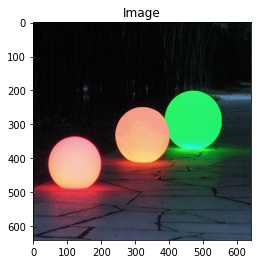

In [ ]:
#visualización imagen "balls"
display(balls)

In [ ]:

def display0(img):
  img = cv2.imread(img,0)
  plt.imshow(img, cmap='gray', vmin=0, vmax=255)
  plt.title('Image')
  clear_output(wait=True)

In [ ]:
def grays(img):
  """
  funcion que retorna una visualización en escala de grises de la imagen asociada al nombre img y su histograma
    
  :param str img: nombre de la imagen a obtener su visualización

  return 
  """
  img = cv2.imread(img,0)
  fig, axs = plt.subplots(1, 2, figsize=(12,3.5))
  axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
  axs[0].set_title('Image')
  axs[1].hist(img.ravel(),256,[0,255],color='k')
  axs[1].set_title('Histogram')
  axs[1].set(ylabel='Pixels Frequency')
  axs[1].set(xlabel='Intensity')
  clear_output(wait=True)

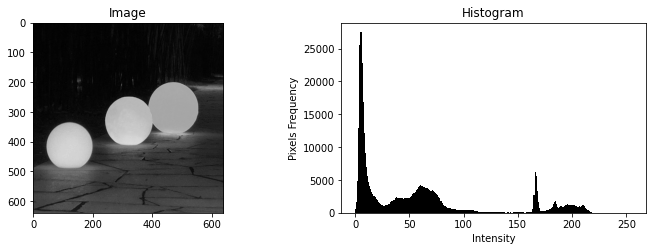

In [ ]:
#visualización en escala de grises de la imagen "balls"
grays(balls)

In [ ]:
def colors(img,scale):
  """
  funcion que retorna una visualización en escala de grises de la imagen asociada al nombre img y su histograma
    azul = 0, verde = 1, rojo = 2
  :param str img: nombre de la imagen a obtener su visualización

  return 
  """
  cmaps = ['gray','Blues','Greens','Reds']
  imgC = cv2.imread(img)
  img = cv2.imread(img,0)
  #fig, axs = plt.subplots(1, 2, figsize=(12,3.5))
  #axs[0].imshow(img, cmap=cmaps[scale], vmin=0, vmax=255)
  #axs[0].set_title('Image')
  if scale == 0:
    plt.hist(img.ravel(),256,[0,255],color='k')
  else:
    plt.hist(imgC[:,:,scale-1].ravel(),256,[0,255],color='k')
  plt.title('Histogram')
  plt.ylabel('Pixels Frequency')
  plt.xlabel('Intensity')
  clear_output(wait=True)

In [ ]:
# La función 'binary' recibe la imagen, la escala de color(grises=0, rojos=1, 
# verdes=2, azules=3) y la cantidad de particiones binarias que se requieren(3, 
# 6, 9 o 12).
def binary(img,scale,threshold):
  if scale == 0:
    img_RBG = cv2.imread(img,0)
  else:
    img_RBG = imread(img)
  cmaps = ['gray','Reds','Greens','Blues']
  T = []
  for i in range(threshold):
    T.append(math.floor(255/threshold)*i)
  T[0]=1
  hT = [0,0,0,1,1,1,2,2,2,3,3,3]
  kT = [0,1,2]*4
  h=0
  k=0
  shapes = {}
  shapes[3] = {0:1, 1:3, 2: [hT[h], kT[k]]}
  shapes[6] = {0:2, 1:3, 2: [hT[h], kT[k]]}
  shapes[9] = {0:3, 1:3}
  shapes[12] = {0:4, 1:3}
  fig, axs = plt.subplots(shapes[threshold][0], shapes[threshold][1], figsize=(
      11.5,4*shapes[threshold][0]))
  for t in T:
    img_0 = []
    for i in range(len(img_RBG)):
      for j in range(len(img_RBG[0])):
        if scale == 0:
          img_x = img_RBG[i][j]
        else:
          img_x = img_RBG[i][j][scale-1]
        if img_x >= t:
          img_0.append(255)
        else:
          img_0.append(1)
    img_0 = np.reshape(np.array(img_0), (640, 640))
    string = str(t)
    string = 'Binary image at threshold = '+string
    if threshold == 3:
      axs[kT[k]].imshow(img_0,cmap=cmaps[scale])
      axs[kT[k]].set_title(string)
    else:
      axs[hT[h], kT[k]].imshow(img_0,cmap=cmaps[scale])
      axs[hT[h], kT[k]].set_title(string)
    h += 1
    k += 1
  clear_output(wait=True)

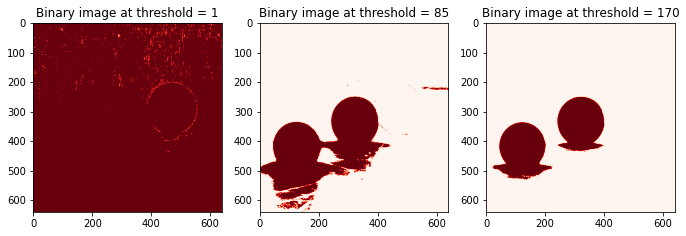

In [ ]:
#ignorar
binary(balls,1,3)

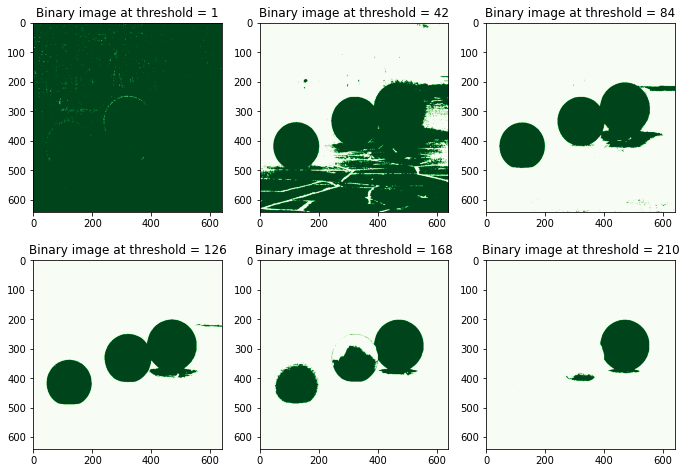

In [ ]:
#ignorar
binary(balls,2,6)

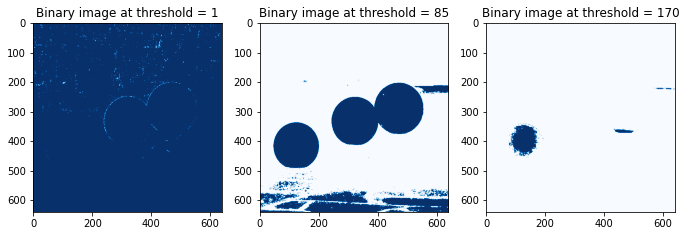

In [ ]:
#ignorar
binary(balls,3,3)

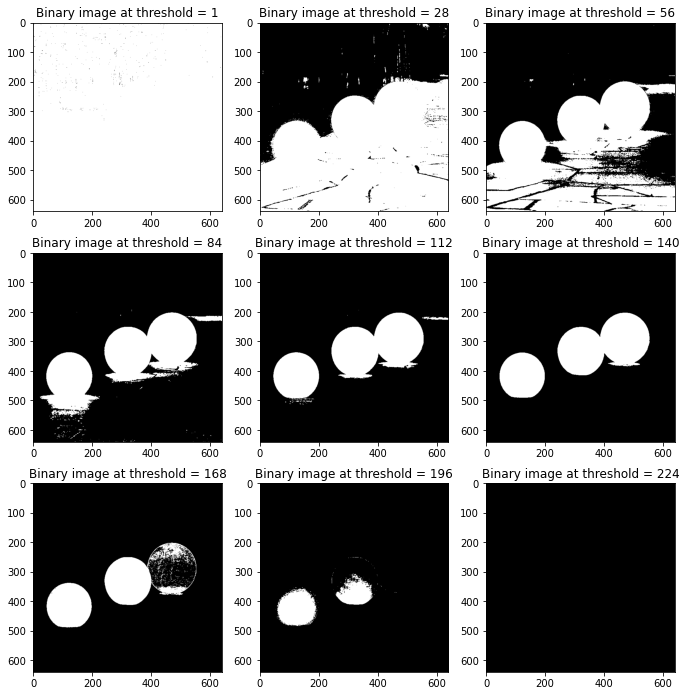

In [ ]:
#representación binaria en escala de grises para varios valores de t
#se prueban 9 valores de t
binary(balls,0,9) 

Puede notarse que para valores pequeños de umbral (primera fila), en la imagenes tiende a dominar el color blanco, para valores altos de umbral (tercera fila),  domina el color negro, y para valores medios, se obtiene un equilibrio entre el blanco y el negro, visualizandose claramente las 3 bolas. Esto se debe a que mientras mas pequeños sean los valores de umbral, un mayor rango de intensidades (umbral, 255) se catalogará con una intensidad extrema de 255 correspondiente al color blanco y por tanto, una mayor cantidad de pixeles asociados. Lo mismo ocurre para valores altos de umbral, donde el rango de intensidades (0, umbral) es mayor, catalogando una mayor cantidad de pixeles en el valor extremo 0 correspondiente al color negro. En el caso de valores medios de umbral, la calsificación alcanza un balance.

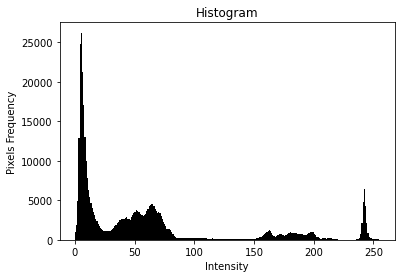

In [ ]:
colors(balls, 2)

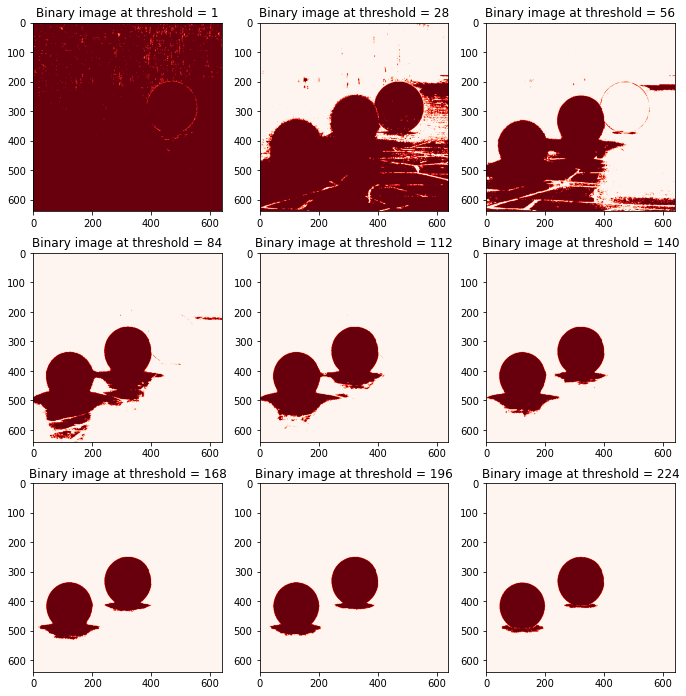

In [ ]:
#representación binaria en escala de rojos para varios valores de t
#se prueban 9 valores de t
binary(balls,1,9)

Se ha escogido el color rojo dadas las tonalidades rojizas de 2 de las 3 bolas.
En este caso puede notarse algo muy similar al caso anterior, donde a medida que el umbral crece, solo las tonalidades mas rojas se mantienen en la visualización, tal que la bola verde desaparece casi inmediatamente, dada su baja intensidad al rojo, y manteniendose hasta el maximo umbral utilizado, una clara visualización de las dos bolas cuya intensidad al rojo es alta.

## Actividad 2

In [ ]:
#noción de la ecuación utilizada para aumentar contraste


#(max-min)=>(255-0)
#(x-min)=>(y-0)

#(y-0) = (x-min)*(255-0)/(max-min)

In [ ]:
def stretch(img):
  """
  funcion que retorna una imagen original y la misma con un mayor contraste, junto a sus respectivos histogramas
    
  :param str img: nombre de la imagen a aumentar contraste

  return 
  """
  img = cv2.imread(img,0)
  img_stretched = np.zeros(img.shape)
  max_img = np.max(img[:][:])
  min_img = np.min(img[:][:])
  for i in range(len(img)):
    for j in range(len(img[0])):
      y = (255/(max_img-min_img))*(img[i][j]-min_img)  #Se aplica la ecuación
      img_stretched[i][j] = int(math.floor(y))
  img_stretched = img_stretched.astype(int)
  fig, axs = plt.subplots(2, 2, figsize=(12,10))
  axs[0, 0].imshow(img, cmap='gray', vmin=0, vmax=255)
  axs[0, 0].set_title('Image')
  axs[0, 1].hist(img.ravel(),256,[0,255],color='k')
  axs[0, 1].set_title('Histogram')
  axs[0, 1].set(ylabel='Frequency')
  axs[1, 0].imshow(img_stretched, cmap='gray')
  axs[1, 0].set_title('Transformed image')
  axs[1, 1].hist(img_stretched.ravel(),256,[0,255],color='k')
  axs[1, 1].set_title('Histogram')
  axs[1, 1].set(ylabel='Frequency')
  axs[1, 1].set(xlabel='Intensity')
  clear_output(wait=True)

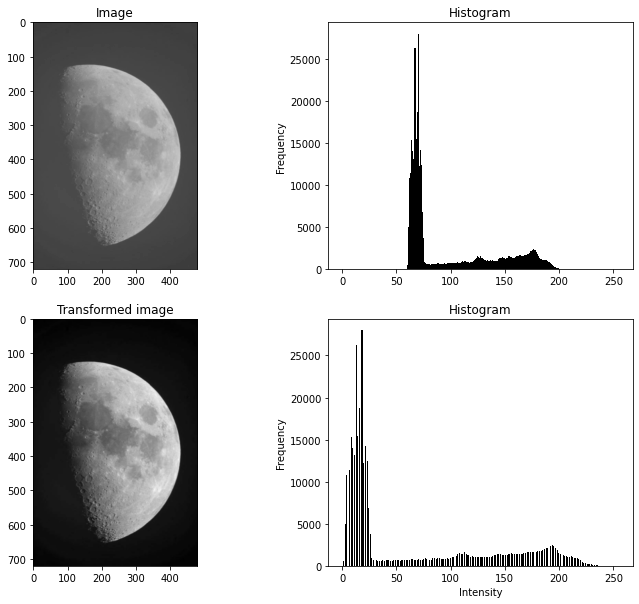

In [ ]:
stretch(moon)

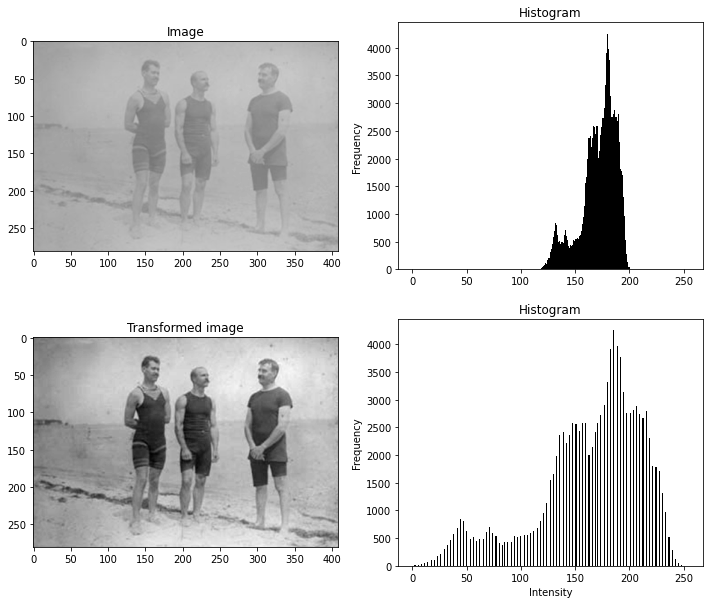

In [ ]:
stretch(old)

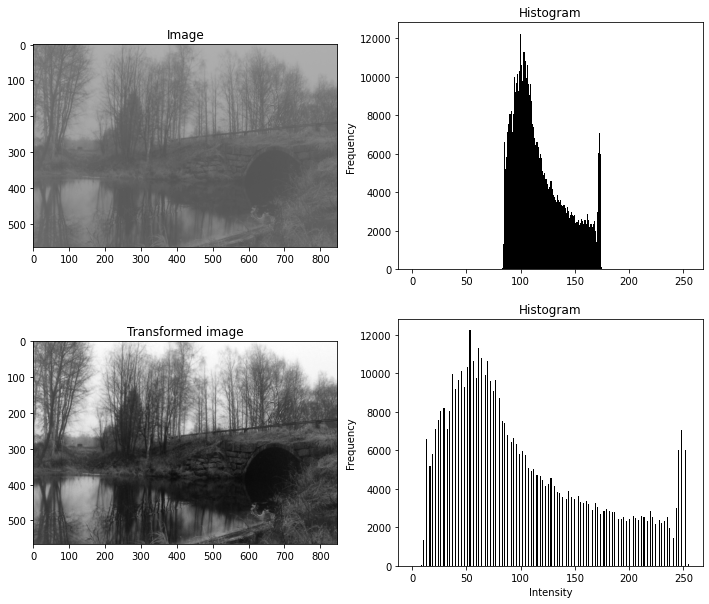

In [ ]:
stretch(river)

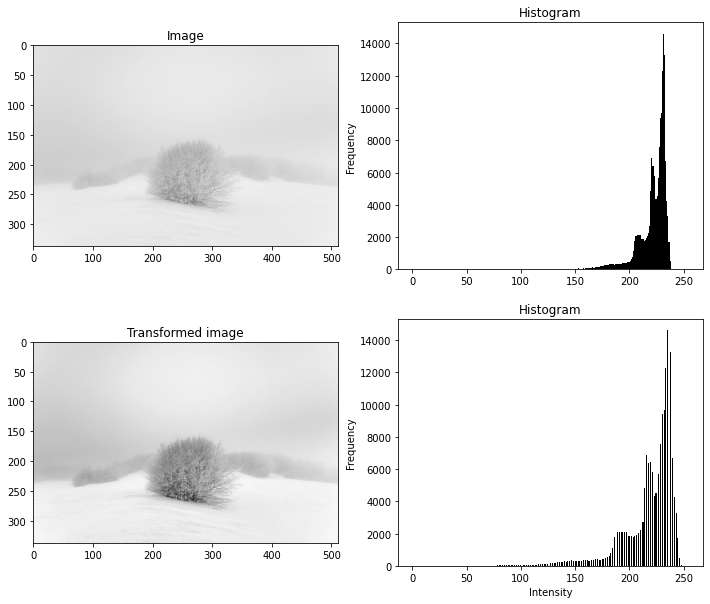

In [ ]:
stretch(landscape)

Puede notarse que al hacer el "estiramiento" en el rango de intensidades, a través de la ecuación lineal presentada en la función stretch, se produce un efecto de aumento de contraste en las imagenes, y esto se debe a que las intensidades mas osucras de los pixeles se trasladan a valores aún mas oscuros, y las intensidades mas claras de los pixeles se trasladan a valores aún mas claros.

## Actividad 3

In [ ]:
def img_hist(t_,threshold,title):
  fig, axs = plt.subplots(1, 2, figsize=(12,3.5))
  hmax = 255
  if np.max(t_)>255:
    hmax = threshold#np.max(t_)
  axs[0].imshow(t_, cmap='gray', vmin=0, vmax=hmax)
  axs[0].set_title(title)
  axs[1].hist(t_.ravel(),256,[0,hmax],color='k')
  axs[1].set_title('Histogram')
  axs[1].set(ylabel='Frequency')
  axs[1].set(xlabel='Intensity')

In [ ]:
def fft(img,threshold):
  """
  Entrega una visualización de la transformada bidimensional de furier de la imagen y su respectivo histograma
  """
  img = cv2.imread(img,0)
  t_fft2 = np.fft.fft2(img)
  t_fft2_s_abs = np.absolute(t_fft2)
  T = [255]
  for i in range(1,threshold):
    T.append(255*(10**i))
  for j in range(len(T)):
    title = 'FFT Image (intensity = [0, ' + str(T[j]) +'])'
    img_hist(t_fft2_s_abs,T[j],title)

In [ ]:
#Se obtiene la transformada bidimensional de fourier
img = cv2.imread(sunset,0)
t_fft2 = np.fft.fft2(img)
t_fft2_s_abs = np.absolute(t_fft2) #se extrae el espectro de fourier

In [ ]:
#visualización de la matriz con los valores de la transformada
t_fft2_s_abs

array([[8.34967507e+08, 6.99346722e+07, 2.75763907e+07, ...,
        9.84286451e+06, 2.75763907e+07, 6.99346722e+07],
       [5.88431978e+07, 2.42920899e+07, 1.35719598e+07, ...,
        8.83243088e+06, 4.28365322e+06, 3.03226361e+07],
       [1.17971014e+07, 1.88781338e+07, 1.07353311e+07, ...,
        3.38230268e+06, 7.65599612e+06, 1.85439224e+07],
       ...,
       [3.21502514e+07, 1.11253536e+07, 1.76721299e+06, ...,
        3.08204832e+06, 4.69632739e+06, 7.97142024e+06],
       [1.17971014e+07, 1.85439224e+07, 7.65599612e+06, ...,
        3.90188192e+06, 1.07353311e+07, 1.88781338e+07],
       [5.88431978e+07, 3.03226361e+07, 4.28365322e+06, ...,
        8.87731308e+06, 1.35719598e+07, 2.42920899e+07]])

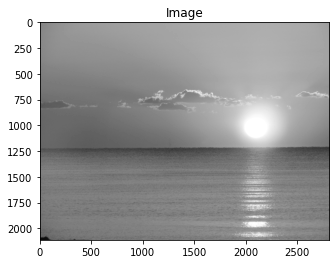

In [ ]:
#imagen sunset en escala de grises
display0(sunset)

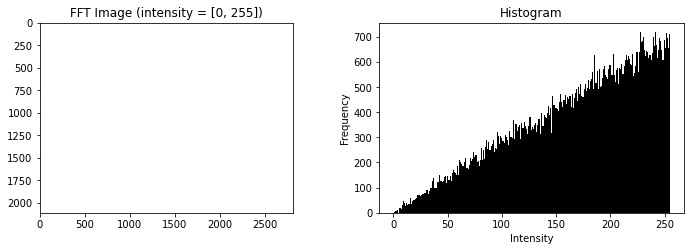

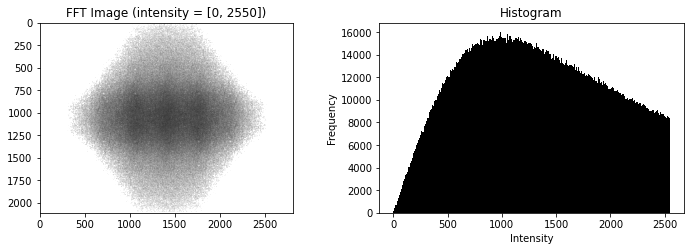

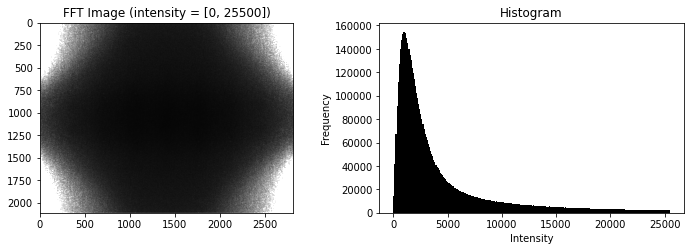

In [ ]:
fft(sunset,3)

Puede notarse que, en primera instancia, para el rango tratado desde un inicio, no logra visualizarse la magnitud de la transsoformada de Fourier para ningún par de frecuencias (x, y), sin embargo, si aumentamos el rango, es posible visualizar los pares de frecuencias cuya magnitud sobresale sobre el resto, lo cual se debe justamente a aumentar la diferencia entre la mayor y la menor intesidad, lo cual podría considerarse una forma de corregir la visualización.

In [ ]:
def fft_log(img,threshold):
  """
  Aplica logaritmo al espectro de Fourier con el objetivo de corregir la visualización.
  """
  img = cv2.imread(img,0)
  t_fft2 = np.fft.fft2(img)
  t_fft2_s_abs = np.absolute(t_fft2)
  t_log = np.zeros(t_fft2_s_abs.shape)
  R = np.max(t_fft2_s_abs)
  c = 255/math.log(1+abs(R))
  for i in range(len(img)):
    for j in range(len(img[0])):
      t_log[i][j] = c*math.log(1+abs(t_fft2_s_abs[i][j]))
  t_log = np.floor(t_log)
  t_log = t_log.astype(uint8)
  T = [255]
  for i in range(1,threshold):
    T.append(255*(10**i))
  for j in range(len(T)):
    title = 'Logarithmic Transform'
    img_hist(t_log,T[j],title)

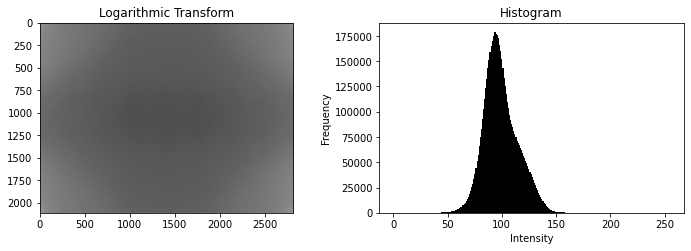

In [ ]:
fft_log(sunset,1)

Puede notarse que efectivamente puede visualizarse esta vez las magnitudes en las frecuencias para los pares (x, y) en el espectro, sin embargo, se visualiza algo mas difuminado que en los casos anteriores. Esto se debe a que el cambio a escala logaritmica "suaviza" los grandes cambios de magnitud para diferentes cambios de los pares de frecuencias, pero también concentra sus valores en un rango que puede ser visible para las intensidades que se visualizan por defecto.

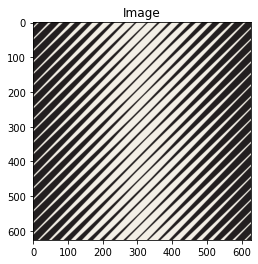

In [ ]:
display(diagonal)

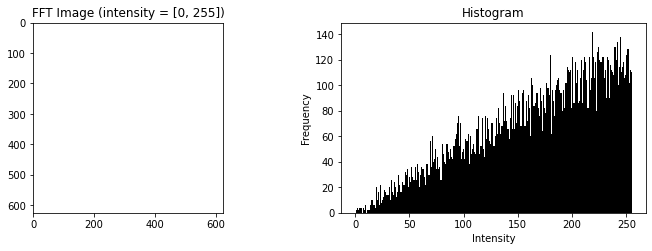

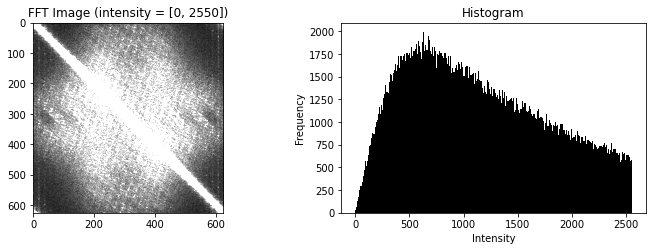

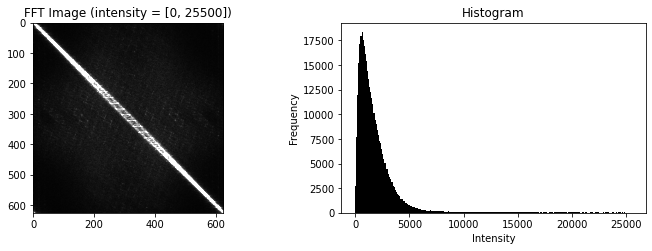

In [ ]:
fft(diagonal,3)

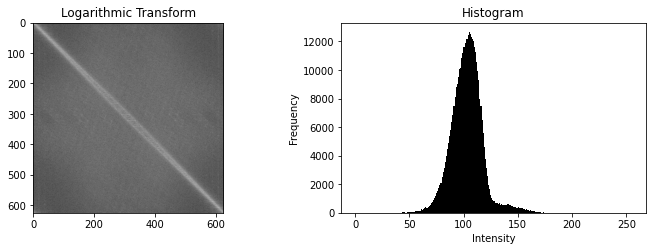

In [ ]:
fft_log(diagonal,1)

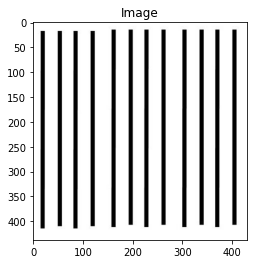

In [ ]:
display(vertical)

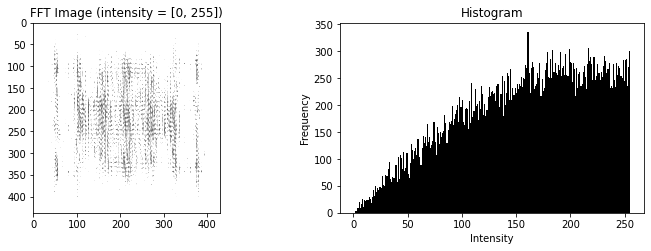

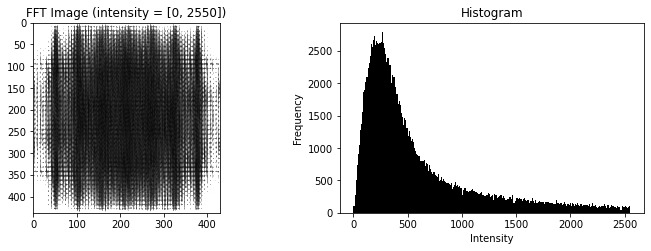

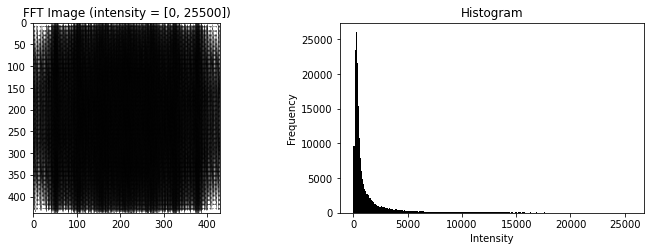

In [ ]:
fft(vertical,3)

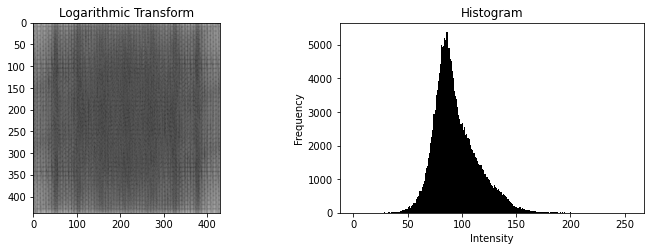

In [ ]:
fft_log(vertical,1)

Con estas últimas imagenes sucede el mismo efecto que lo comentado para sunset, donde con la escala logaritmica, el espectro logra visulizarse de una forma mas evidente, limpia y suave, por las razones que comentamos anteriormente. La forma de sus transoformadas también tiene una forma similar, observandose un patrón en el espectro, el cual se debe a la combinación de frecuencias que posee la imagen original, la cual es un patrón en si.

## Actividad 4

In [ ]:
def fftshift_log(img,threshold):
  img = cv2.imread(img,0)
  t_fft2 = np.fft.fft2(img)
  t_fft2_s = np.fft.fftshift(t_fft2)
  t_fft2_s_abs = np.absolute(t_fft2_s)
  t_log = np.zeros(t_fft2_s_abs.shape)
  R = np.max(t_fft2_s_abs)
  c = 255/math.log(1+abs(R))
  for i in range(len(img)):
    for j in range(len(img[0])):
      t_log[i][j] = c*math.log(1+abs(t_fft2_s_abs[i][j]))
  t_log = np.floor(t_log)
  t_log = t_log.astype(uint8)
  T = [255]
  for i in range(1,threshold):
    T.append(255*(10**i))
  for j in range(len(T)):
    img_hist(t_log,T[j],'Logarithmic Transform of FFT Shift')

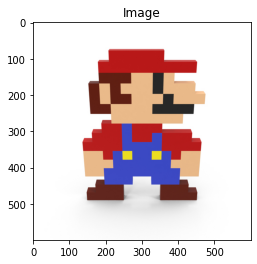

In [ ]:
display(mario)

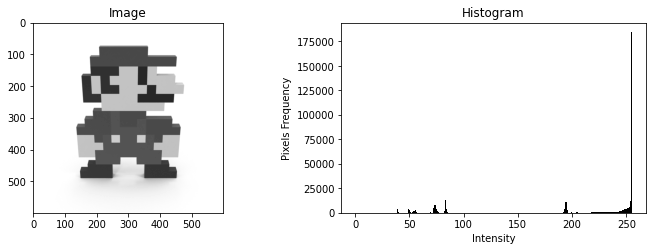

In [ ]:
grays(mario)

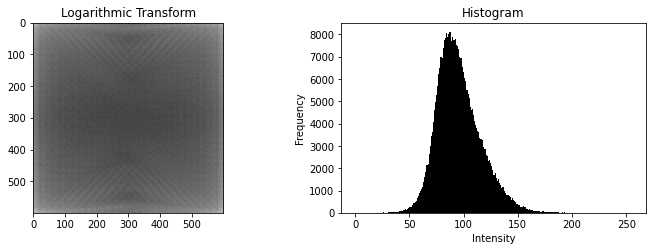

In [ ]:
fft_log(mario,1)

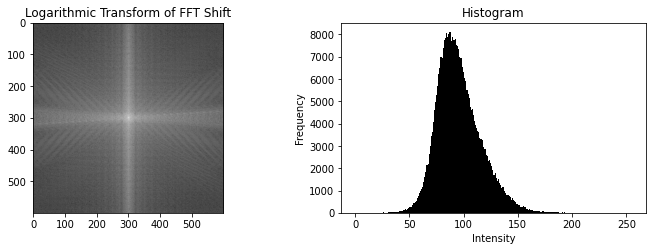

In [ ]:
fftshift_log(mario,1)

In [ ]:
def fft_shift_rot8(img,threshold,angle):
  hmax = 1
  img = cv2.imread(img,0)
  rotated = rotate(img,angle)
  fig, axs = plt.subplots(1, 2, figsize=(12,3.5))
  axs[0].imshow(rotated, cmap='gray', vmin=0, vmax=hmax)
  title = 'Image rotated in '+str(angle)+'°'
  axs[0].set_title(title)
  axs[1].hist(rotated.ravel(),256,[0,hmax],color='k')
  axs[1].set_title('Histogram')
  axs[1].set(ylabel='Frequency')
  axs[1].set(xlabel='Intensity')

  t_fft2 = np.fft.fft2(rotated)
  t_fft2_abs = np.absolute(t_fft2)
  t_log = np.zeros(t_fft2_abs.shape)
  R = np.max(t_fft2_abs)
  c = 255/math.log(1+abs(R))
  for i in range(len(rotated)):
    for j in range(len(rotated[0])):
      t_log[i][j] = c*math.log(1+abs(t_fft2_abs[i][j]))
  t_log = np.floor(t_log)
  t_log = t_log.astype(uint8)
  T = [255]
  for i in range(1,threshold):
    T.append(255*(10**i))
  for j in range(len(T)):
    img_hist(t_log,T[j],'Logarithmic Transform')
    
  t_fft2 = np.fft.fft2(rotated)
  t_fft2_s = np.fft.fftshift(t_fft2)
  t_fft2_s_abs = np.absolute(t_fft2_s)
  t_log = np.zeros(t_fft2_s_abs.shape)
  R = np.max(t_fft2_s_abs)
  c = 255/math.log(1+abs(R))
  for i in range(len(rotated)):
    for j in range(len(rotated[0])):
      t_log[i][j] = c*math.log(1+abs(t_fft2_s_abs[i][j]))                       
  t_log = np.floor(t_log)
  t_log = t_log.astype(uint8)
  T = [255]
  for i in range(1,threshold):
    T.append(255*(10**i))
  for j in range(len(T)):
    img_hist(t_log,T[j],'Logarithmic Transform of FFT Shift')

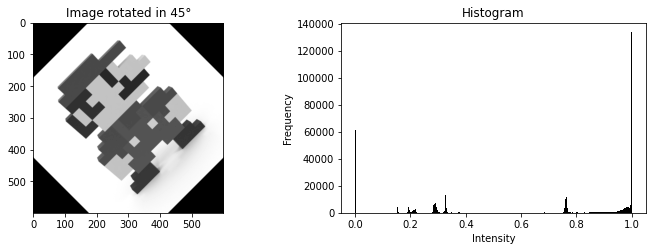

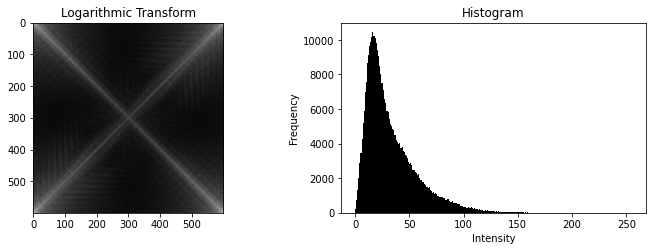

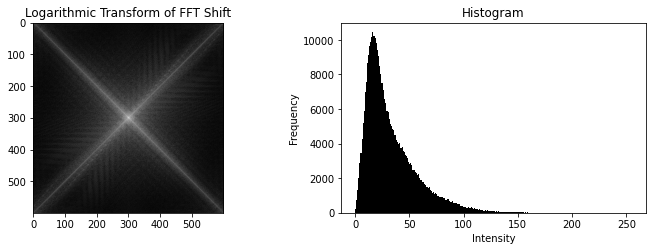

In [ ]:
fft_shift_rot8(mario,1,45)

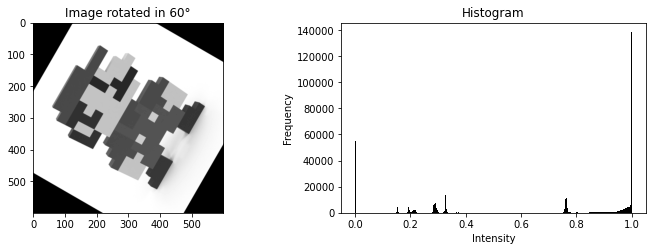

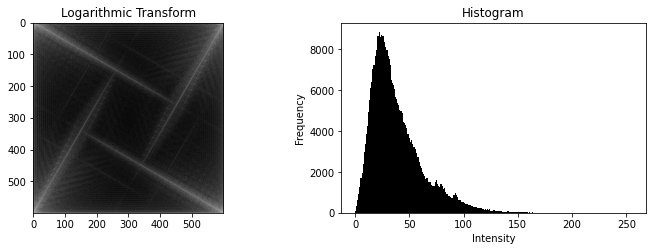

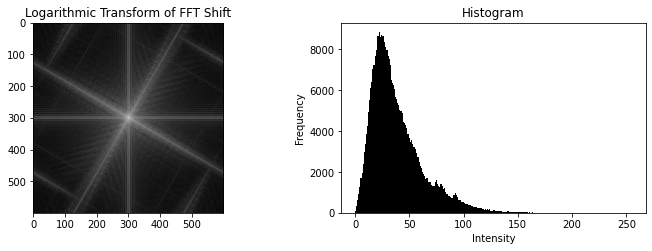

In [ ]:
fft_shift_rot8(mario,1,60)

Primero comentar que la rotación obtenida no es satisfactoria, pues las esquinas negras cambian la imagen a la cual se le obtiene la transformada de fourier, sin embargo, en la escala logaritmica de la imagen rotada en 60 grados puede verse un trazado que corresponde a la imagen rotada en 45 grados pero rotada en angulo que corresponde también a 45 grados, lo cual se hace aún mas evidente al observar la imagen sin rotar con respecto a la imagen rotada en 45 grados, se concluye entonces lo siguiente:


las componentes de frecuencias que se mantienen rotan al igual que la imagen original, lo cual corresponde a la popiedad de rotación de la transformada de Fourier la cual dice que al rotar una imagen en una cierta cantidad de grados, su transformada de fourier también rotará en la misma cantidad de grados, pero manteniendo su forma.


La diferencia en las transformadas al rotar la imagen corresponde a estas esquinas negras que surgen por el método de rotación utilizado, lo cual hubiera querido evitarse.

In [ ]:
!jupyter nbconvert --to html /content/Lab1(2).ipynb

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `jupyter nbconvert --to html /content/Lab1(2).ipynb'
